## Import of libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import matplotlib as mpl
mpl.style.use('classic')

In [3]:
import tensorflow as tf
print("Tensorflow version: {}".format(tf.__version__))

Tensorflow version: 1.12.0


## Preparation of the data

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [5]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

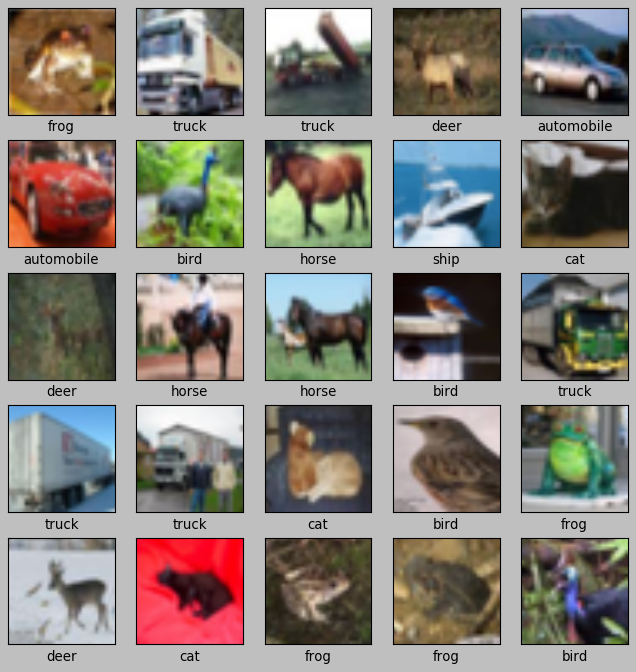

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## Neural Network Model

### Creation of the model

In [7]:
input_shape = (32,32,3)

In [8]:
def createModel():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((1, 1))) #averaging pooling
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (1, 1), activation='relu'))
    model.add(layers.MaxPooling2D((1, 1))) #averaging pooling
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [9]:
model = createModel()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
__________

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training of the network

In [11]:
#batch_size = 256
epochs = 50
history = model.fit(x_train, y_train, epochs=epochs, 
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 238s 5ms/step - loss: 1.7077 - acc: 0.3611 - val_loss: 1.5482 - val_acc: 0.4251
Epoch 2/50
50000/50000 [==============================] - 235s 5ms/step - loss: 1.4355 - acc: 0.4744 - val_loss: 1.4389 - val_acc: 0.4883
Epoch 3/50
50000/50000 [==============================] - 239s 5ms/step - loss: 1.3370 - acc: 0.5163 - val_loss: 1.3544 - val_acc: 0.5286
Epoch 4/50
50000/50000 [==============================] - 238s 5ms/step - loss: 1.2767 - acc: 0.5389 - val_loss: 1.2199 - val_acc: 0.5709
Epoch 5/50
50000/50000 [==============================] - 238s 5ms/step - loss: 1.2255 - acc: 0.5595 - val_loss: 1.1691 - val_acc: 0.5810
Epoch 6/50
50000/50000 [==============================] - 240s 5ms/step - loss: 1.1936 - acc: 0.5722 - val_loss: 1.1040 - val_acc: 0.6116
Epoch 7/50
50000/50000 [==============================] - 237s 5ms/step - loss: 1.1590 - acc: 0.5891 - val_loss: 1.2451 - 

## Plots

Text(0, 0.5, 'Loss')

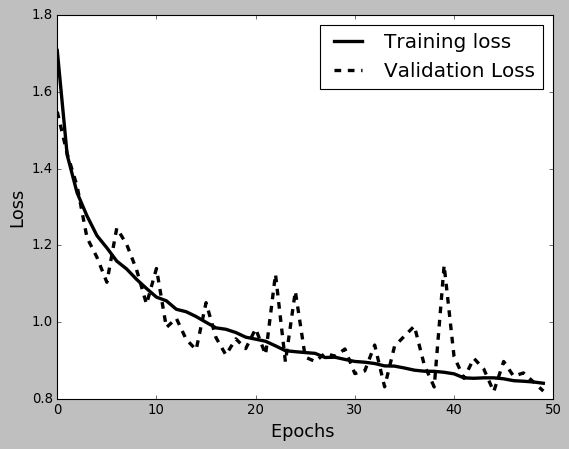

In [15]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)

#plt.savefig('ch3-michelucci-figxx1.png', bbox_inches='tight', dpi = 300)
#files.download('loss.png')

Text(0, 0.5, 'Accuracy')

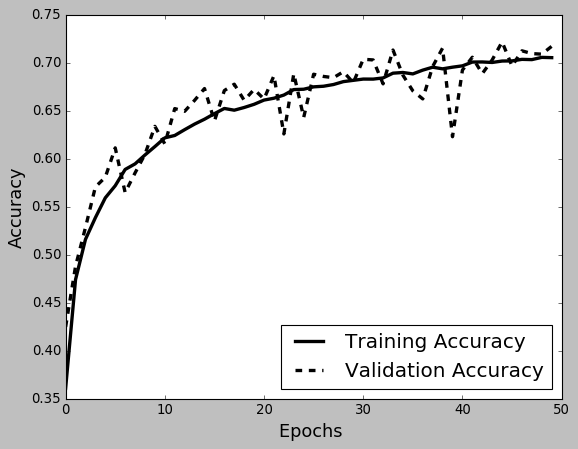

In [20]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('ch3-michelucci-figxx2.png', bbox_inches='tight', dpi = 300)
#files.download('accuracy.png')

In [21]:
history.history['val_acc'][-1]

0.7174

In [22]:
history.history['acc'][-1]

0.70558

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
__________

#  SAVING THE MODEL

In [24]:
model.save("savedmodels/model3.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
 #To Import the model 
new_model = tf.keras.models.load_model('savedmodels/model3.h5')
new_model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
__________

In [26]:
score =new_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (new_model.metrics_names[1], score[1]*100))

acc: 71.74%
